# Global Warming Dataset EDA

# Data Card


Dataset source & link, shape (rows/cols), units, time coverage:
*   Dataset source: Global Warming Dataset: 195 Countries (1900-2023)
*   Dataset link: https://www.kaggle.com/datasets/ankushpanday1/global-warming-dataset-195-countries-1900-2023
*   shape: 100,000 rows and 26 columns
*   units: numerical, categorical
*   time coverage: 1900-2023


Column dictionary (human-readable; short), key ID columns, target(s) if any:
*   shape: 100,000 rows and 26 columns

      * Country - the country identifier
      * Year - the year, from 1900-2023
      * Temperature_Anomoly - difference in temperature from baseline, in °C
      * CO2_Emissions - total CO2 emissions, in metric tons
      * Population - number of people in the country
      * Forest Area - area of forest cover, in % of land area
      * GDP - Gross Domestic Product, in USD
      * Renewable_Energy_Usage - total energy derived from renewable energy sources, in %
      * Methane_Emissions - total methane emissions, in metric tons CO2 equivalent
      * Sea_Level_Rise - change in sea level, in mm
      * Arctic_Ice_Extent - area covered by arctic ice, in million km²
      * Urbanization - population living in urban areas, in %
      * Deforestation_Rate - loss of forest area, in %
      * Extreme_Weather_Events - count of extreme events that occurred
      * Average_Rainfall - average precipitation, in mm
      * Solar_Energy_Potential - potential for solar energy, in kWh/m²
      * Waste_Management - score of the country's waste management practices, in %
      * Per_Capita_Emissions - total greenhouse gases emissions per capita, in tons / person
      * Industrial_Activity - industrial output or production, in %
      * Air_Pollution_Index - air quality index, from 0-300
      * Biodiversity_Index - measures the variety of species, in %
      * Ocean_Acidification - pH level of ocean
      * Fossil_Fuel_Usage - total energy consumption from fossil fuels, in %
      * Energy_Consumption_Per_Capita - energy usage per person
      * Policy_Score - the country's climate policy performance score, from 0-100
      * Average_Temperature - average temperature, in °C



Missingness snapshot: which columns have NaNs and rough %:
*   NaNs: zero columns


Known quirks (e.g., mixed types, inconsistent labels):
*    the meaning of the values for some of the columns, such as the policy score, and the units for some are ambiguous
*    The countries column did not specify the names of the actual countries and instead labeled countries numerically


# Load

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import kagglehub

In [2]:
# download dataset
kagglehub.dataset_download("ankushpanday1/global-warming-dataset-195-countries-1900-2023")

100%|██████████| 20.5M/20.5M [00:00<00:00, 83.8MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/ankushpanday1/global-warming-dataset-195-countries-1900-2023/versions/1'

In [3]:
# read csv file

# if after running the cell above the output says "Downloading from https://www.kaggle.com/api/v1/datasets/download/sukhmandeepsinghbrar/water-quality?dataset_version_number=1..."
# then run this cell without changing anything
df = pd.read_csv("/root/.cache/kagglehub/datasets/ankushpanday1/global-warming-dataset-195-countries-1900-2023/versions/1/global_warming_dataset.csv")


# OTHERWISE, if after running the cell above the output says "Using Colab cache for faster access ...", comment out the line above, uncomment the line below, and run
#df = pd.read_csv("/kaggle/input/global-warming-dataset-195-countries-1900-2023/global_warming_dataset.csv")

# Inspect

In [4]:
# overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Country                        100000 non-null  object 
 1   Year                           100000 non-null  int64  
 2   Temperature_Anomaly            100000 non-null  float64
 3   CO2_Emissions                  100000 non-null  float64
 4   Population                     100000 non-null  float64
 5   Forest_Area                    100000 non-null  float64
 6   GDP                            100000 non-null  float64
 7   Renewable_Energy_Usage         100000 non-null  float64
 8   Methane_Emissions              100000 non-null  float64
 9   Sea_Level_Rise                 100000 non-null  float64
 10  Arctic_Ice_Extent              100000 non-null  float64
 11  Urbanization                   100000 non-null  float64
 12  Deforestation_Rate             

In [5]:
# check how many null values
df.isna().sum()

,0
Country,0
Year,0
Temperature_Anomaly,0
CO2_Emissions,0
Population,0
Forest_Area,0
GDP,0
Renewable_Energy_Usage,0
Methane_Emissions,0
Sea_Level_Rise,0


In [6]:
# Keep a record of columns that ever contain NaNs and fill with 0 to keep ops stable(even if none now)
missing_snapshot = df.isna().sum().sort_values(ascending=False)
df = df.fillna(0)


In [7]:
# see mean, min, max, etc. for each column
df.describe()

,Year,Temperature_Anomaly,CO2_Emissions,Population,Forest_Area,GDP,Renewable_Energy_Usage,Methane_Emissions,Sea_Level_Rise,Arctic_Ice_Extent,...,Waste_Management,Per_Capita_Emissions,Industrial_Activity,Air_Pollution_Index,Biodiversity_Index,Ocean_Acidification,Fossil_Fuel_Usage,Energy_Consumption_Per_Capita,Policy_Score,Average_Temperature
count,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1961.422100,0.002647,5.007007e+08,7.501973e+08,50.012410,4.995923e+12,50.115658,5.003713e+06,22.568046,8.003934,...,50.009789,9.969773,50.103537,149.627677,49.980862,8.000390,49.992644,2548.333145,49.996621,15.034994
std,35.758799,1.154579,2.887388e+08,4.328709e+08,28.806287,2.883117e+12,28.841490,2.887606e+06,15.908163,4.039130,...,28.890850,5.757802,28.913039,86.599662,28.865166,0.288574,28.897143,1416.670184,28.843091,14.435303
min,1900.000000,-1.999981,1.022271e+05,1.013054e+06,0.000052,1.524737e+08,0.005306,1.133254e+03,-4.999954,1.000036,...,0.000038,0.000402,0.002979,0.001419,0.001155,7.500007,0.000688,100.031306,0.003098,-9.999950
25%,1930.000000,-0.999449,2.504223e+08,3.762545e+08,24.960397,2.507503e+12,25.302244,2.501312e+06,8.739127,4.504867,...,25.114615,5.020629,25.062131,74.727558,24.923304,7.750314,24.959449,1320.219583,25.022509,2.572759
50%,1961.000000,0.003523,5.006769e+08,7.499212e+08,50.141257,4.985849e+12,50.011581,4.997724e+06,22.728423,7.999331,...,49.903504,9.921851,50.120981,149.508132,50.103281,8.001478,50.027087,2547.118914,49.979245,15.018782
75%,1992.000000,0.998067,7.506318e+08,1.125222e+09,74.898296,7.489082e+12,75.095944,7.507855e+06,36.333150,11.499503,...,75.072693,14.958753,75.279997,224.633077,74.835842,8.248930,75.062747,3775.215399,74.934651,27.537743
max,2023.000000,1.999958,9.999793e+08,1.499992e+09,99.999831,9.999894e+12,99.999493,9.999928e+06,49.997680,14.999878,...,99.999938,19.999826,99.999127,299.992559,99.999568,8.499991,99.999789,4999.981227,99.999622,39.998836


In [8]:
# see the first 5 rows of the dataset
df.head()

,Country,Year,Temperature_Anomaly,CO2_Emissions,Population,Forest_Area,GDP,Renewable_Energy_Usage,Methane_Emissions,Sea_Level_Rise,...,Waste_Management,Per_Capita_Emissions,Industrial_Activity,Air_Pollution_Index,Biodiversity_Index,Ocean_Acidification,Fossil_Fuel_Usage,Energy_Consumption_Per_Capita,Policy_Score,Average_Temperature
0,Country_103,1913,-1.163537,8.876061e+08,1.627978e+08,54.872178,6.139887e+12,76.710013,8.317626e+06,8.111839,...,82.691409,2.285351,4.060975,150.285539,90.073356,8.025470,39.163860,1480.164332,78.870012,20.825292
1,Country_180,1950,-0.432122,4.497517e+08,4.281359e+08,84.051006,2.601447e+12,68.450021,6.206540e+06,42.025915,...,59.322883,17.411668,85.300604,27.305922,88.289837,8.021719,28.252554,1482.730048,32.600905,28.720587
2,Country_93,2014,0.444954,4.579080e+08,4.926732e+08,72.295357,5.192677e+12,36.725699,1.056885e+06,20.953840,...,94.982931,12.039703,83.804880,216.911429,86.936256,7.647408,61.548382,706.918809,37.671300,15.014084
3,Country_15,2020,-1.171616,5.049503e+08,1.252169e+09,17.259684,8.252128e+12,77.547901,1.986813e+06,45.599595,...,62.064250,2.853957,47.014265,35.869182,44.904331,7.569353,82.423750,2616.238324,86.581725,-1.277086
4,Country_107,1964,-0.564038,6.898891e+08,2.932960e+08,44.438605,8.560746e+12,10.019576,3.313252e+06,7.652150,...,84.431279,19.801173,89.379613,284.263093,8.102916,8.015415,29.964450,4975.683780,20.618406,2.861989


# Transform

In [9]:
# vectorized boolean mask

# new column Temperature_Increased indicates whether the average temperature had increased that year
df['Temperature_Increased'] = df['Temperature_Anomaly'] > 0
df

,Country,Year,Temperature_Anomaly,CO2_Emissions,Population,Forest_Area,GDP,Renewable_Energy_Usage,Methane_Emissions,Sea_Level_Rise,...,Per_Capita_Emissions,Industrial_Activity,Air_Pollution_Index,Biodiversity_Index,Ocean_Acidification,Fossil_Fuel_Usage,Energy_Consumption_Per_Capita,Policy_Score,Average_Temperature,Temperature_Increased
0,Country_103,1913,-1.163537,8.876061e+08,1.627978e+08,54.872178,6.139887e+12,76.710013,8.317626e+06,8.111839,...,2.285351,4.060975,150.285539,90.073356,8.025470,39.163860,1480.164332,78.870012,20.825292,False
1,Country_180,1950,-0.432122,4.497517e+08,4.281359e+08,84.051006,2.601447e+12,68.450021,6.206540e+06,42.025915,...,17.411668,85.300604,27.305922,88.289837,8.021719,28.252554,1482.730048,32.600905,28.720587,False
2,Country_93,2014,0.444954,4.579080e+08,4.926732e+08,72.295357,5.192677e+12,36.725699,1.056885e+06,20.953840,...,12.039703,83.804880,216.911429,86.936256,7.647408,61.548382,706.918809,37.671300,15.014084,True
3,Country_15,2020,-1.171616,5.049503e+08,1.252169e+09,17.259684,8.252128e+12,77.547901,1.986813e+06,45.599595,...,2.853957,47.014265,35.869182,44.904331,7.569353,82.423750,2616.238324,86.581725,-1.277086,False
4,Country_107,1964,-0.564038,6.898891e+08,2.932960e+08,44.438605,8.560746e+12,10.019576,3.313252e+06,7.652150,...,19.801173,89.379613,284.263093,8.102916,8.015415,29.964450,4975.683780,20.618406,2.861989,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Country_137,1950,-1.375490,4.992342e+08,1.367949e+09,41.626745,5.306692e+12,24.336086,9.804349e+06,20.358875,...,11.821878,56.643135,169.827985,52.786245,8.076625,97.991111,4046.811944,24.669342,26.871686,False
99996,Country_42,1921,1.276176,5.846066e+08,1.010792e+09,60.002708,9.424760e+12,44.476904,3.426378e+05,31.390165,...,7.973512,93.214237,255.464276,40.109954,7.645927,70.214189,1412.742149,36.337520,7.530304,True
99997,Country_53,1971,1.195518,5.892516e+08,1.466795e+09,25.123278,3.906999e+12,71.098234,4.429090e+06,39.559624,...,7.504673,5.589021,99.687705,96.533330,8.212195,15.046938,3559.131658,30.097024,38.919621,True
99998,Country_60,1940,-0.344281,5.008876e+08,4.591192e+07,15.060626,9.563223e+12,35.280451,5.345707e+06,39.800826,...,17.927533,15.659615,35.390332,15.097057,7.568341,83.158341,1523.274491,64.546178,-3.204884,False


In [10]:
# count how many rows had an increase in temperature
df.Temperature_Increased.value_counts()

,count
Temperature_Increased,
True,50078
False,49922


In [11]:
# function for determining air quality from numerical value
# returns rating ranging from Good to Very Unhealthy (source: https://www.airnow.gov/aqi/aqi-basics/)
def pollution_index(x):
    if x > 200:
        return "Very Unhealthy"
    elif 150 < x <= 200:
        return "Unhealthy"
    elif 100 < x <= 150:
        return "Unhealthy for Sensitive Groups"
    elif 50 < x <= 100:
        return "Moderate"
    else:
        return "Good"

# categorize Air_Pollution_Index column using the function
Air_Quality = df.Air_Pollution_Index.map(pollution_index)
df["Air_Quality"] = df["Air_Pollution_Index"].map(pollution_index)
Air_Quality

,Air_Pollution_Index
0,Unhealthy
1,Good
2,Very Unhealthy
3,Good
4,Very Unhealthy
...,...
99995,Unhealthy
99996,Very Unhealthy
99997,Moderate
99998,Good


In [12]:
Air_Quality.value_counts()

,count
Air_Pollution_Index,
Very Unhealthy,33104
Moderate,16897
Unhealthy,16731
Good,16673
Unhealthy for Sensitive Groups,16595


In [13]:
# Make categories ordered for nicer sorting/plots.
cat_order = pd.CategoricalDtype(
    categories=["Low Income", "Lower-Middle Income", "Upper-Middle Income", "High Income"],
    ordered=True
)



In [14]:
# calculate GDP per capita (thresholds determined by info in this article: https://blogs.worldbank.org/en/opendata/world-bank-country-classifications-by-income-level-for-2024-2025)
# formula: GDP/Population (source: https://boycewire.com/per-capita-definition/)
df['GDP_Per_Capita'] = df['GDP']/df['Population']

# categorize into Low, Lower-Middle, Upper-Middle, High
def GDP_index(x):
    if x >= 13846: return "High Income"
    elif x >= 4466: return "Upper-Middle Income"
    elif x >= 1136: return "Lower-Middle Income"
    else: return "Low Income"


# categorize GDP_Per_Capita column
df["GDP_Per_Capita_Category"] = df["GDP_Per_Capita"].map(GDP_index).astype(cat_order)
df['GDP_Per_Capita_Category']

,GDP_Per_Capita_Category
0,High Income
1,Upper-Middle Income
2,Upper-Middle Income
3,Upper-Middle Income
4,High Income
...,...
99995,Lower-Middle Income
99996,Upper-Middle Income
99997,Lower-Middle Income
99998,High Income


In [15]:
# see the first 5 rows with the new columns
df.head()

,Country,Year,Temperature_Anomaly,CO2_Emissions,Population,Forest_Area,GDP,Renewable_Energy_Usage,Methane_Emissions,Sea_Level_Rise,...,Biodiversity_Index,Ocean_Acidification,Fossil_Fuel_Usage,Energy_Consumption_Per_Capita,Policy_Score,Average_Temperature,Temperature_Increased,Air_Quality,GDP_Per_Capita,GDP_Per_Capita_Category
0,Country_103,1913,-1.163537,8.876061e+08,1.627978e+08,54.872178,6.139887e+12,76.710013,8.317626e+06,8.111839,...,90.073356,8.025470,39.163860,1480.164332,78.870012,20.825292,False,Unhealthy,37714.797446,High Income
1,Country_180,1950,-0.432122,4.497517e+08,4.281359e+08,84.051006,2.601447e+12,68.450021,6.206540e+06,42.025915,...,88.289837,8.021719,28.252554,1482.730048,32.600905,28.720587,False,Good,6076.216275,Upper-Middle Income
2,Country_93,2014,0.444954,4.579080e+08,4.926732e+08,72.295357,5.192677e+12,36.725699,1.056885e+06,20.953840,...,86.936256,7.647408,61.548382,706.918809,37.671300,15.014084,True,Very Unhealthy,10539.800503,Upper-Middle Income
3,Country_15,2020,-1.171616,5.049503e+08,1.252169e+09,17.259684,8.252128e+12,77.547901,1.986813e+06,45.599595,...,44.904331,7.569353,82.423750,2616.238324,86.581725,-1.277086,False,Good,6590.268781,Upper-Middle Income
4,Country_107,1964,-0.564038,6.898891e+08,2.932960e+08,44.438605,8.560746e+12,10.019576,3.313252e+06,7.652150,...,8.102916,8.015415,29.964450,4975.683780,20.618406,2.861989,False,Very Unhealthy,29188.076552,High Income


# Group/Summarize

In [16]:
# count how many countries per year have seen an increase in temperature
df.groupby('Year').Temperature_Increased.value_counts()

Year  Temperature_Increased
1900  True                     426
      False                    414
1901  False                    402
      True                     402
1902  True                     402
                              ... 
2021  False                    387
2022  False                    398
      True                     362
2023  True                     378
      False                    373
Name: count, Length: 248, dtype: int64

In [17]:
# display the min, max, and average CO2 Emissions by year
df.sort_values('CO2_Emissions').groupby('Year').CO2_Emissions.agg(['min', 'max', 'mean'])

,min,max,mean
Year,,,
1900,2.648510e+05,9.994142e+08,5.181398e+08
1901,1.663390e+06,9.970289e+08,4.981432e+08
1902,1.550965e+06,9.995463e+08,5.127557e+08
1903,1.392346e+06,9.995313e+08,5.240900e+08
1904,7.220912e+05,9.986003e+08,5.047782e+08
...,...,...,...
2019,1.012621e+06,9.993077e+08,4.952070e+08
2020,2.841678e+06,9.995817e+08,5.117511e+08
2021,7.107863e+05,9.991070e+08,5.091741e+08


In [18]:
# Derive CO2 per person
df["CO2_per_capita"] = df["CO2_Emissions"] / df["Population"]

co2pc_by_income = (
    df.groupby("GDP_Per_Capita_Category", observed=False)["CO2_per_capita"]
      .agg(mean="mean", median="median")
      .reset_index()
      .sort_values("mean", ascending=False)
)
co2pc_by_income.head()


,GDP_Per_Capita_Category,mean,median
3,High Income,7.607411,2.180370
2,Upper-Middle Income,0.825057,0.596532
0,Low Income,0.692379,0.500515
1,Lower-Middle Income,0.654720,0.503578


# Visualize

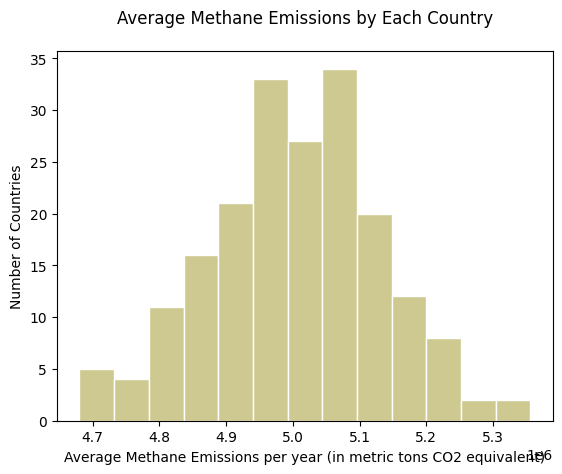

In [19]:
# histogram showing the average Methane emissions produced by countries
sns.histplot(data=df, x=df.groupby('Country').Methane_Emissions.mean(), color="darkkhaki", edgecolor="white")
plt.title('Average Methane Emissions by Each Country', pad=20)
plt.xlabel('Average Methane Emissions per year (in metric tons CO2 equivalent)')
plt.ylabel('Number of Countries');

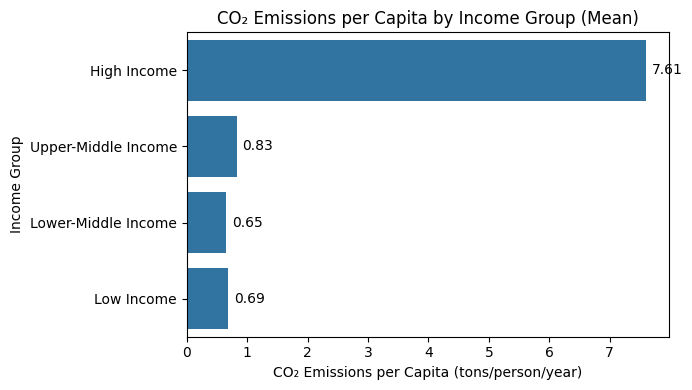

In [20]:
# Plot shwoing CO₂ per capita by income group
plt.figure(figsize=(7,4))
plt.title("CO₂ Emissions per Capita by Income Group (Mean)")
plt.xlabel("CO₂ Emissions per Capita (tons/person/year)")
plt.ylabel("Income Group")
plt.ticklabel_format(style="plain", axis="x")
order = ["High Income","Upper-Middle Income","Lower-Middle Income","Low Income"]
ax = sns.barplot(data=co2pc_by_income, y="GDP_Per_Capita_Category", x="mean", order=order)


for p in ax.patches:
    ax.annotate(f"{p.get_width():.2f}",
                (p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(4,0), textcoords="offset points", va="center")
plt.tight_layout()


In [21]:
top = co2pc_by_income.sort_values("mean", ascending=False).iloc[0]
bot = co2pc_by_income.sort_values("mean", ascending=False).iloc[-1]
print(f"CO₂ per person is highest in {top['GDP_Per_Capita_Category']} (~{top['mean']:.2f}) "
      f"and lowest in {bot['GDP_Per_Capita_Category']} (~{bot['mean']:.2f}).")

CO₂ per person is highest in High Income (~7.61) and lowest in Lower-Middle Income (~0.65).


/tmp/ipython-input-122475727.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.barh(df.GDP_Per_Capita_Category.unique(), df.groupby(['GDP_Per_Capita_Category']).CO2_Emissions.mean(), color=bar_colors)


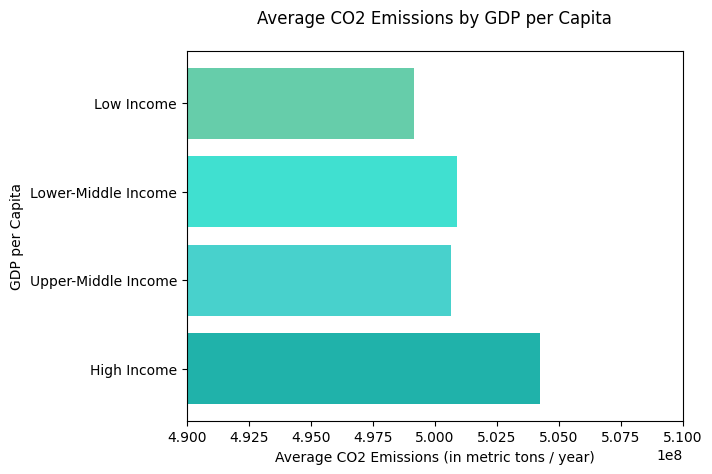

In [22]:
# Showing the relationship between GDP per capita and the average CO2 Emissions per year

# set colors
bar_colors = ['lightseagreen', 'mediumturquoise', 'turquoise', 'mediumaquamarine']

# plot
plt.barh(df.GDP_Per_Capita_Category.unique(), df.groupby(['GDP_Per_Capita_Category']).CO2_Emissions.mean(), color=bar_colors)
plt.title('Average CO2 Emissions by GDP per Capita', pad=20)
plt.xlabel('Average CO2 Emissions (in metric tons / year)')
plt.ylabel('GDP per Capita')
plt.xlim(4.900000e+08,5.10e+08)
plt.show()

/tmp/ipython-input-1923902465.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  v1, v2, v3 = df_selected.groupby(['GDP_Per_Capita_Category']).CO2_Emissions.mean(), df_selected2.groupby(['GDP_Per_Capita_Category']).CO2_Emissions.mean(), df_selected3.groupby(['GDP_Per_Capita_Category']).CO2_Emissions.mean()


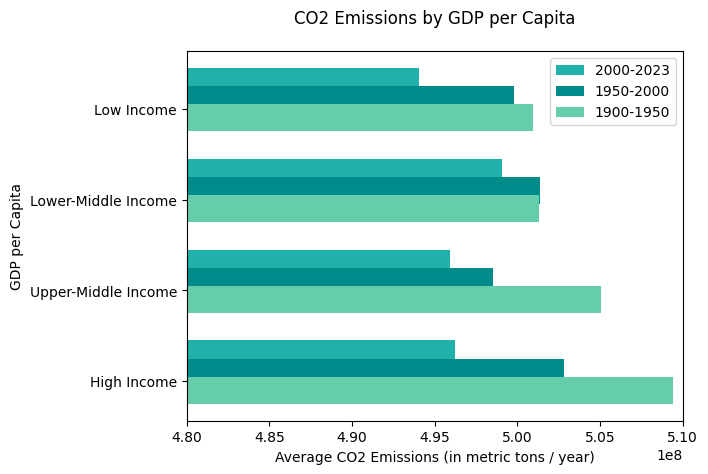

In [23]:
# older version of the bar graph above, this time highlighting different periods of time
# NOTE: this one may not be as accurate as newer graphs

df_selected = df[(df['Year'] <= 2023) & (df['Year'] >= 2000)]
df_selected2 = df[(df['Year'] < 2000) & (df['Year'] >= 1950)]
df_selected3 = df[(df['Year'] < 1950) & (df['Year'] >= 1900)]

cats = df.GDP_Per_Capita_Category.unique()
v1, v2, v3 = df_selected.groupby(['GDP_Per_Capita_Category']).CO2_Emissions.mean(), df_selected2.groupby(['GDP_Per_Capita_Category']).CO2_Emissions.mean(), df_selected3.groupby(['GDP_Per_Capita_Category']).CO2_Emissions.mean()
w, x = 0.3, np.arange(len(cats))

plt.barh(x + w, v1, w, label='2000-2023', color='lightseagreen')
plt.barh(x + w/3, v2, w, label='1950-2000', color='darkcyan')
plt.barh(x - w/3, v3, w, label='1900-1950', color='mediumaquamarine')

plt.title('CO2 Emissions by GDP per Capita', pad=20)
plt.xlabel('Average CO2 Emissions (in metric tons / year)')
plt.ylabel('GDP per Capita')

plt.yticks(x, cats)
plt.legend()

plt.xlim(4.800000e+08, 5.10e+08)

plt.show()